In [1]:
import numpy as np
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue
 

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
  
    
    # # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

KeyboardInterrupt: 

In [ ]:
#CONVERTING MEDIAPIPE TO DATAFRAME

In [17]:
!pip install pandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
print(pd.__version__)

2.1.2


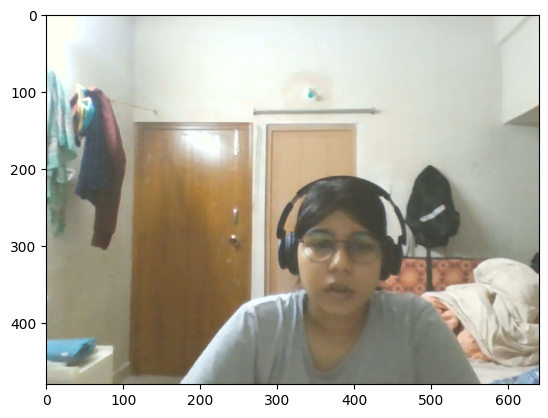

In [4]:
plt.imshow(image)

In [15]:
results.left_hand_landmarks

In [6]:
face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()

if results.face_landmarks:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i,['x','y','z']] = [point.x,point.y,point.z]
    
if results.pose_landmarks:
    for i, point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i,['x','y','z']] = [point.x,point.y,point.z]
    
if results.left_hand_landmarks:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i,['x','y','z']] = [point.x,point.y,point.z]

if results.right_hand_landmarks:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i,['x','y','z']] = [point.x,point.y,point.z]

In [19]:
face

,x,y,z
0,0.592860,0.692530,-0.037388
1,0.591751,0.643409,-0.053630
2,0.594612,0.661940,-0.031464
3,0.588156,0.600875,-0.033007
4,0.591997,0.628714,-0.055451
...,...,...,...
463,0.632736,0.576694,0.012015
464,0.625933,0.578745,0.006558
465,0.621332,0.579411,-0.000175
466,0.682902,0.572488,0.011739


In [32]:
pose

,x,y,z
0,0.534868,0.738536,-1.272294
1,0.566102,0.681522,-1.204099
2,0.581004,0.686214,-1.204059
3,0.594452,0.691046,-1.203801
4,0.516928,0.671931,-1.195033
5,0.499221,0.670774,-1.195171
6,0.483505,0.670770,-1.195359
7,0.623493,0.728912,-0.804358
8,0.460959,0.699483,-0.754650
9,0.563564,0.815237,-1.123609


<Axes: xlabel='x', ylabel='y'>

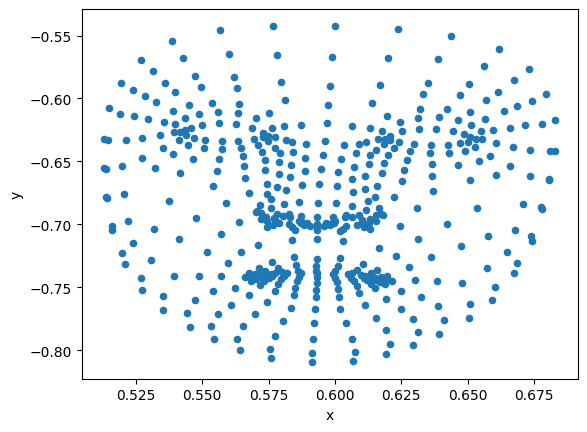

In [11]:
face['y'] = -face['y']
face.plot(x='x',y='y', kind = 'scatter')

<Axes: xlabel='x', ylabel='y'>

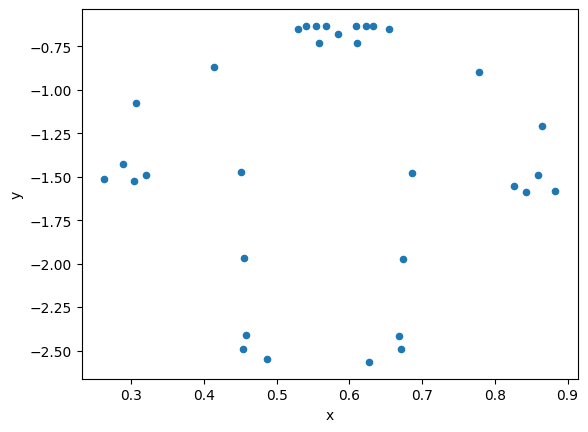

In [12]:
pose['y'] = -pose['y']
pose.plot(x='x',y='y', kind = 'scatter')

In [13]:
left_hand['y'] = -left_hand['y']
left_hand.plot(x='x',y='y', kind = 'scatter')

KeyError: 'y'

<Axes: xlabel='x', ylabel='y'>

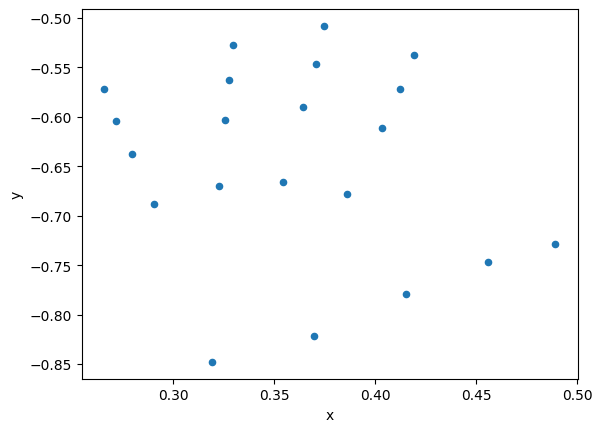

In [30]:
right_hand['y'] = -right_hand['y']
right_hand.plot(x='x',y='y', kind = 'scatter')

In [3]:
## KAGGLE COMPETITION DATA


In [14]:
train = pd.read_csv('../train_new_csv.csv')
pq_file = '../asl_dataset_new/kaggle/new_asl_signs/train_landmark_files/62590/1031693648.parquet'
xyz = pd.read_parquet(pq_file)

In [15]:
xyz

,frame,row_id,type,landmark_index,x,y,z
0,18,18-face-0,face,0,0.475590,0.531558,-0.034152
1,18,18-face-1,face,1,0.466407,0.509517,-0.055053
2,18,18-face-2,face,2,0.470551,0.517825,-0.030868
3,18,18-face-3,face,3,0.456586,0.484850,-0.036239
4,18,18-face-4,face,4,0.465152,0.501568,-0.057607
...,...,...,...,...,...,...,...
9226,34,34-right_hand-16,right_hand,16,0.414001,0.718623,-0.071983
9227,34,34-right_hand-17,right_hand,17,0.391388,0.725359,-0.095390
9228,34,34-right_hand-18,right_hand,18,0.463518,0.746418,-0.095647
9229,34,34-right_hand-19,right_hand,19,0.436986,0.754992,-0.079764


In [16]:
train.query('sequence_id == 1031693648')

,path,participant_id,sequence_id,sign
2,train_landmark_files/62590/1031693648.parquet,62590,1031693648,hello


In [17]:
ROWS_PER_FRAME = 543 #no of landmarks per frame

def load_relevant_data_subset(pq_file):
    data_columns = ['x','y','z']
    data = pd.read_parquet(pq_file, columns = data_columns)
    n_frames = int(len(data) /ROWS_PER_FRAME)
    print(len(data))
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    print(n_frames)
    return data.astype(np.float32)
    

In [18]:
xyz['frame'].value_counts()

frame
18    543
27    543
33    543
32    543
31    543
30    543
29    543
28    543
26    543
19    543
25    543
24    543
23    543
22    543
21    543
20    543
34    543
Name: count, dtype: int64

In [31]:
xyz_np = load_relevant_data_subset(pq_file)

9231
17


In [32]:
xyz_np.shape

(17, 543, 3)

In [34]:
xyz.query('frame == 33')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [35]:
xyz

,frame,row_id,type,landmark_index,x,y,z
0,18,18-face-0,face,0,0.475590,0.531558,-0.034152
1,18,18-face-1,face,1,0.466407,0.509517,-0.055053
2,18,18-face-2,face,2,0.470551,0.517825,-0.030868
3,18,18-face-3,face,3,0.456586,0.484850,-0.036239
4,18,18-face-4,face,4,0.465152,0.501568,-0.057607
...,...,...,...,...,...,...,...
9226,34,34-right_hand-16,right_hand,16,0.414001,0.718623,-0.071983
9227,34,34-right_hand-17,right_hand,17,0.391388,0.725359,-0.095390
9228,34,34-right_hand-18,right_hand,18,0.463518,0.746418,-0.095647
9229,34,34-right_hand-19,right_hand,19,0.436986,0.754992,-0.079764


In [36]:
# Create kaggle type format from our detected landmarks

<Axes: xlabel='x', ylabel='y'>

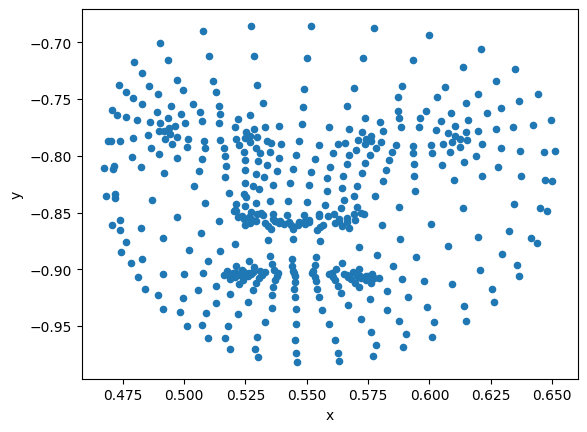

In [10]:
face['y'] = -face['y']
face.plot(x='x',y='y', kind = 'scatter')

In [11]:
landmarks = pd.DataFrame()

In [11]:
def create_frame_landmark_df(results,frame):
    xyz_skel = xyz[['type','landmark_index']].drop_duplicates().reset_index(drop = True) \
    .copy()
    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()
    
    if results.face_landmarks:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i,['x','y','z']] = [point.x,point.y,point.z]
        
    if results.pose_landmarks:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i,['x','y','z']] = [point.x,point.y,point.z]
        
    if results.left_hand_landmarks:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i,['x','y','z']] = [point.x,point.y,point.z]
    
    if results.right_hand_landmarks:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i,['x','y','z']] = [point.x,point.y,point.z]
    face = face.reset_index() \
        .rename(columns = {'index' : 'landmark_index'}) \
        .assign(type = 'face')
    
    pose = pose.reset_index() \
        .rename(columns = {'index' : 'landmark_index'}) \
        .assign(type = 'pose')
    left_hand = left_hand.reset_index() \
        .rename(columns = {'index' : 'landmark_index'}) \
        .assign(type = 'left_hand')
    right_hand = right_hand.reset_index() \
        .rename(columns = {'index' : 'landmark_index'}) \
        .assign(type = 'right_hand')
    
    landmarks = pd.concat([face,pose, left_hand, right_hand]).reset_index(drop=True)
    landmarks = xyz_skel.merge(landmarks,on = ['type', 'landmark_index'], how= 'left')
    landmarks = landmarks.assign(frame = frame)
    return landmarks


In [19]:
landmarks = create_frame_landmark_df(results,0)

,type,landmark_index,x,y,z,frame
0,face,0,0.537292,0.910117,-0.027878,0
1,face,1,0.535431,0.871002,-0.043572,0
2,face,2,0.537313,0.884001,-0.024439,0
3,face,3,0.529857,0.831724,-0.029177,0
4,face,4,0.535290,0.858542,-0.045564,0
...,...,...,...,...,...,...
538,right_hand,16,NaN,NaN,NaN,0
539,right_hand,17,NaN,NaN,NaN,0
540,right_hand,18,NaN,NaN,NaN,0
541,right_hand,19,NaN,NaN,NaN,0


In [16]:
face.shape

(468, 5)